In [591]:

import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


In [599]:
df1 = pd.read_csv("../Project1/경기국면/0900_0910_rate.csv")
df2 = pd.read_csv("./경기국면/코스피지수 과거 데이터.csv")
df3 = pd.read_csv("../Project1/y_0930_close.csv")
df4 = pd.read_csv("../Project1/경기국면/RETRUN(합친거).csv")

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      699 non-null    object
 1   시가      699 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB


In [604]:

#df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')

df2['시가'] = df2['시가'].str.replace(',','').astype(float)
df2['date'] = df2['날짜']
df2 =df2.drop('날짜' ,axis=1)
# # Convert all columns (except 'date') to float
# for col in df2.columns:
#     if col != '날짜':
#         df2[col] = df2[col].astype(float)



In [605]:
from datetime import datetime

date_string = "20181001"
df3['date'] = datetime.strptime(date_string, "%Y%m%d")


In [606]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df3['date'] = pd.to_datetime(df3['date'], format='%Y-%m-%d')

In [607]:
col_list = [df1,df2]
X = pd.merge(df1, df2, on='date', how='inner')
m = pd.merge(X,df3, on='date', how='inner')
# X['date'] = pd.to_datetime(X['date'], format='%Y-%m-%d')
# X['date'] = X['date'].astype(object)
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      int64         
 1   date              0 non-null      datetime64[ns]
 2   y_rate            0 non-null      float64       
 3   KODEX_return      0 non-null      float64       
 4   PER               0 non-null      float64       
 5   PBR               0 non-null      float64       
 6   Dividend_Yield    0 non-null      float64       
 7   Kosdaq150_return  0 non-null      float64       
 8   S&P500_return     0 non-null      float64       
 9   WTI_change        0 non-null      float64       
 10  WTI_Volume        0 non-null      float64       
 11  T10Y2Y            0 non-null      float64       
 12  T10Y3M            0 non-null      float64       
 13  VIX               0 non-null      float64       
 14  시가                0 non-null      floa

In [597]:
from sklearn.preprocessing import MinMaxScaler

y= m['close']
X =X.drop(['date','Unnamed: 0','y_rate'],axis=1)
X.feature = X.columns 

# StandardScaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(X)
data_scaled = scaler.transform(X)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=X.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled




ValueError: could not convert string to float: '2,943.6700'

In [ ]:
X.isnull().sum()

KODEX_return        0
PER                 0
PBR                 0
Dividend_Yield      0
Kosdaq150_return    0
S&P500_return       0
WTI_change          0
WTI_Volume          0
T10Y2Y              0
T10Y3M              0
VIX                 0
시가                  0
dtype: int64

<Axes: >

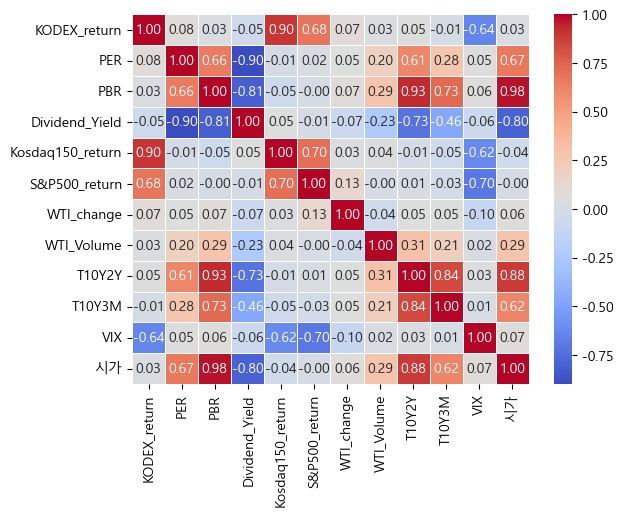

In [ ]:
sns.heatmap(x_scaled.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

In [ ]:
X_scaled = x_scaled.drop(['T10Y2Y','Kosdaq150_return','PBR','S&P500_return','WTI_Volume','WTI_change','Dividend_Yield','VIX'],axis=1)

# OLS 정보 보기 
feature_add = sm.add_constant(X_scaled, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     798.5
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          6.99e-247
Time:                        10:33:24   Log-Likelihood:                -5983.4
No. Observations:                 644   AIC:                         1.198e+04
Df Residuals:                     639   BIC:                         1.200e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.946e+04    466.097     41.758      0.000    1.85e+04    2.04e+04
KODEX_return  1871.9150    830.616      2.254      0.025     240.848    3502.982
PER             1.2e+04    510.332     23.521      0.000     1.1e+04     1.3e+04
T10Y3M        1413.1054    432.790      3.265      0.001     563.242    2262.968
시가            9958.9852    629.086     15.831      0.000    8723.659    1.12e+04
==============================================================================
Omnibus:                       10.675   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.214
Skew:                           0.117   Prob(JB):                       0.0271
Kurtosis:                       2.538   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

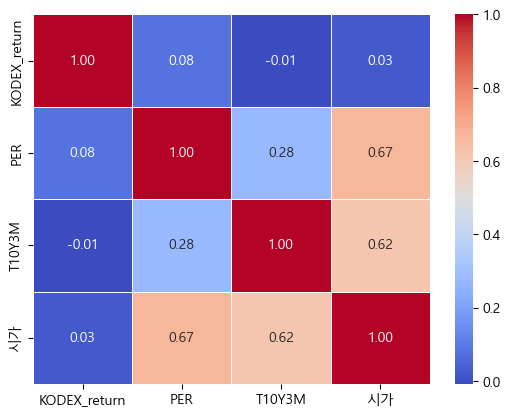

In [ ]:
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
a = sm.add_constant(X_scaled)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = a.columns
vif["VIF Factor"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]

# VIF 결과 출력
print(vif)


        Feature  VIF Factor
0         const   20.180042
1  KODEX_return    1.007839
2           PER    1.919978
3        T10Y3M    1.703818
4            시가    2.842791


In [ ]:
# X.drop(['const'],axis=1,inplace=True)
X.columns

Index(['KODEX_return', 'PER', 'PBR', 'Dividend_Yield', 'Kosdaq150_return',
       'S&P500_return', 'WTI_change', 'WTI_Volume', 'T10Y2Y', 'T10Y3M', 'VIX',
       '시가'],
      dtype='object')

In [ ]:
X_scaled[500:]

,KODEX_return,PER,T10Y3M,시가
500,0.473038,0.096306,0.182692,0.211989
501,0.570208,0.092985,0.132212,0.201652
502,0.625200,0.094645,0.168269,0.205733
503,0.355045,0.100042,0.139423,0.218587
504,0.473038,0.101702,0.129808,0.207244
...,...,...,...,...
639,0.251468,0.382731,0.286058,0.254240
640,0.342232,0.367787,0.305288,0.236650
641,0.459690,0.355334,0.298077,0.201363
642,0.558462,0.349523,0.281250,0.182601


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y, test_size=0.2,random_state=11)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
result=pd.DataFrame({'y':y_test.values,'y_pred':y_pred, 'diff':np.abs(y_test.values-y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
117,40940.0,34902.032822,6037.967178
17,41076.0,35100.562973,5975.437027
116,40977.0,35188.091191,5788.908809
88,40648.0,35025.813525,5622.186475
118,21370.0,26843.472886,5473.472886
...,...,...,...
12,34700.0,34477.008026,222.991974
14,34686.0,34497.403750,188.596250
73,41031.0,41217.112599,186.112599
112,34832.0,34940.806068,108.806068


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_pred,y_test)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'r2_score:{score:.2f}')

Mean Squared Error: 7294045.39
Root Mean Squared Error: 2700.75
r2_score:0.78


<Axes: >

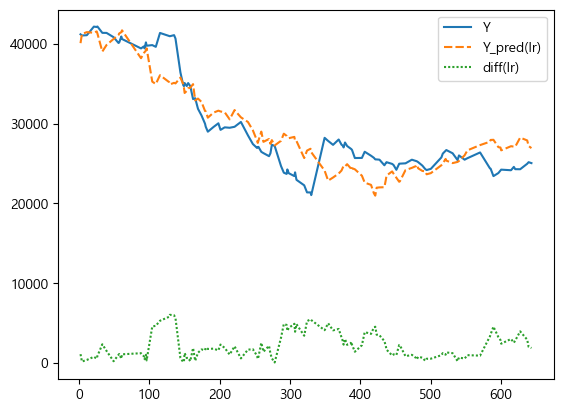

In [ ]:
y_pred = lr.predict(X_test)
lr_df = pd.DataFrame(data={'Y':y_test, 'Y_pred(lr)':y_pred,'diff(lr)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=lr_df)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

score=tree_model.score(X_test,y_test)


print('의사결정회귀 R2: {0:.2f}'.format(score))


의사결정회귀 R2: 0.97


In [ ]:
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)} )
tree_df.sort_values(by=['diff(tree)'],ascending=False).head(10)

,Y,Y_pred(tree),diff(tree)
330,21033.0,26189.0,5156.0
137,40648.0,36400.0,4248.0
144,36409.0,40497.0,4088.0
589,23414.0,26293.0,2879.0
230,30201.0,27443.0,2758.0
165,33179.0,30861.0,2318.0
402,25694.0,27989.0,2295.0
150,35076.0,32821.0,2255.0
373,27353.0,25137.0,2216.0
369,28003.0,25850.0,2153.0


<Axes: >

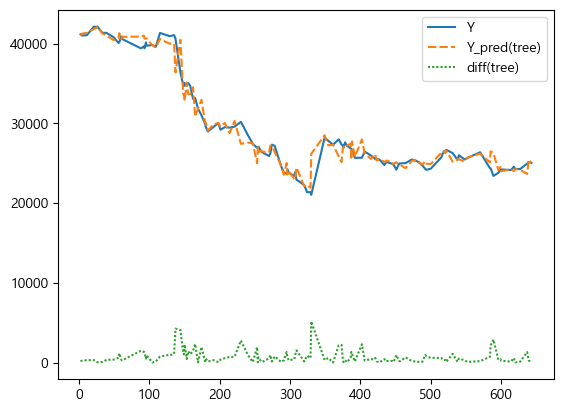

In [ ]:
sns.lineplot(data=tree_df)

In [ ]:
df
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaler
    ('regressor', LinearRegression())  # Linear regression model
])

pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

coefficients = pipeline['regressor'].coef_

intercept = pipeline['regressor'].intercept_
mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_pred):.3f}")
print("Coefficients (Weights):", coefficients)
print("Intercept (Bias):", intercept)